# Linear Regression

In [1]:
import os

In [2]:
os.chdir('C:\\Users\\joana\\PycharmProjects\\pythonProject1\\SIB\\src')

In [3]:
from si.data import Dataset, summary,StandardScaler
from si.supervised.linreg import LinearRegression,LinearRegressionReg
import numpy as np
import os

In [4]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,A,Y
mean,2.987301e-16,5.839135
vars,1.000000e+00,30.049970
min,-8.137648e-01,-2.680700
max,3.647694e+00,24.147000


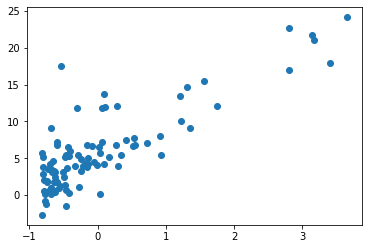

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.Y)
    plt.show()


## Linear Regression using closed form 

In [6]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [7]:
idx = 10
x = dataset.X[idx]
print("x = ",x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616557
y_true =  3.2522


In [8]:
lr.cost()

4.476971375975178

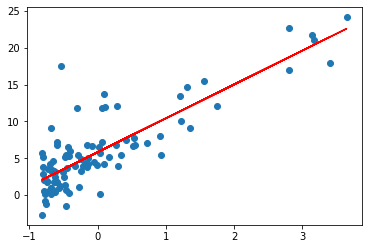

In [9]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.Y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [10]:
lr = LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.59304113]


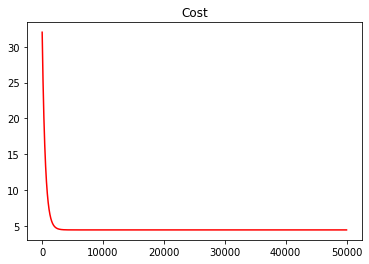

In [11]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [12]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.54617337]


In [13]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.94709123823497
y_true =  3.2522


# Logistic Regression

In [14]:
from si.supervised.logreg import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [15]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.Y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

,A,B,Y
mean,5.843333,3.054000,0.666667
vars,0.681122,0.186751,0.222222
min,4.300000,2.000000,0.000000
max,7.900000,4.400000,1.000000


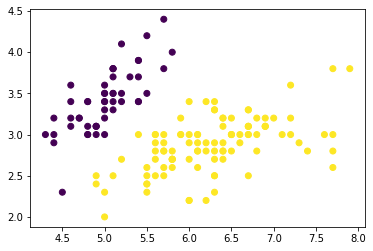

In [16]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
plt.show()

In [17]:
logreg = LogisticRegression(epochs=20000)

In [18]:
logreg.fit(dataset)
logreg.theta

array([-0.30425044,  1.41730047, -2.25671188])

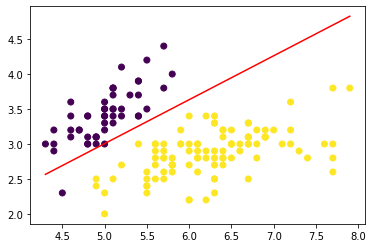

In [19]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

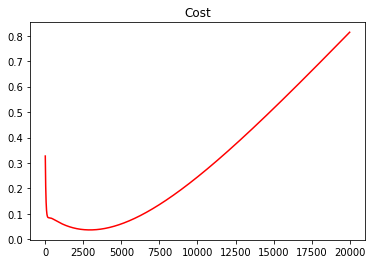

In [20]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [21]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


AttributeError: 'LogisticRegression' object has no attribute 'probability'

# Logistic Regression with L2 regularization

In [29]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-0.88465655,  2.34501229, -3.72252587])

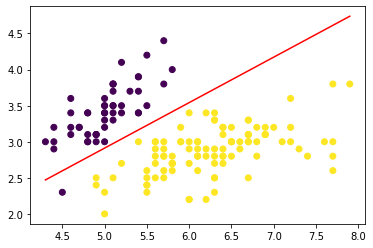

In [31]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [32]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Cross Validation

In [24]:
from si.util.cv import CrossValidationScores

In [25]:
logreg = LogisticRegression(epochs=1000)
cv = CrossValidationScores(logreg,dataset,cv=5)
cv.run()
cv.toDataframe()

AttributeError: module 'numpy' has no attribute 'arrange'

In [26]:
logreg = LogisticRegressionReg(epochs=500, lbd=0.5)
cv = CrossValidationScores(logreg, dataset, cv=4)
cv.run()
cv.toDataframe()

AttributeError: module 'numpy' has no attribute 'arrange'

# Grid Search with CV

In [27]:
from si.util.cv import GridSearchCV

In [28]:
parameters ={'epochs':[100,200,400,800,1000],'lbd':[0,0.2,0.4,0.6]}
gs = GridSearchCV(logreg, dataset, parameters, cv=3, split=0.8)
gs.run()
df = gs.toDataframe()

AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
df.sort_values(by=['CV_1 train','CV_1 test'])